# Notebook to plot distance of progenitors and stromal cells at E12.5 to the border of the tissue
# (relative to figure 3)

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import os
import seaborn as sns
from statannot import add_stat_annotation
import glob
from scipy import stats

# Load data progenitors / Normalization to random

In [2]:
All_data = pandas.read_csv('Data/Distance_to_border_progenitors_E12.csv')

In [4]:
Kit_distance_border_random = All_data.loc[(All_data.progenitor_type == 'CD45-, Kit+') & (All_data.type == 'random_data')]
Kit_distance_border = All_data.loc[(All_data.progenitor_type == 'CD45-, Kit+') & (All_data.type == 'observed_data')]

CD45_distance_border_random = All_data.loc[(All_data.progenitor_type == 'CD45+, Kit-') & (All_data.type == 'random_data')]
CD45_distance_border = All_data.loc[(All_data.progenitor_type == 'CD45+, Kit-') & (All_data.type == 'observed_data')]

CD45_Kit_distance_border_random = All_data.loc[(All_data.progenitor_type == 'CD45+, Kit+') & (All_data.type == 'random_data')]
CD45_Kit_distance_border = All_data.loc[(All_data.progenitor_type == 'CD45+, Kit+') & (All_data.type == 'observed_data')]

In [ ]:
# CD45- Kit+ cells
Kit_distance_border_random_normalized_E12 = pandas.DataFrame()
Kit_distance_border_normalized_E12 = pandas.DataFrame()

for date in Kit_distance_border.date.unique():
    random_basis = Kit_distance_border_random.loc[Kit_distance_border_random.date == date].groupby(['r']).mean().reset_index()
    observed_data = Kit_distance_border.loc[Kit_distance_border.date == date].reset_index(drop=True)
    observed_data['mean_smooth_normalized'] = observed_data['mean_smooth']/random_basis['mean_smooth'] 
    random_basis['mean_smooth_normalized'] =  random_basis['mean_smooth']/random_basis['mean_smooth'] 

    Kit_distance_border_random_normalized_E12 = pandas.concat([Kit_distance_border_random_normalized_E12, random_basis]).reset_index(drop=True)
    Kit_distance_border_normalized_E12 = pandas.concat([Kit_distance_border_normalized_E12, observed_data]).reset_index(drop=True)

Kit_distance_border_normalized_E12['type'] = 'E12.5'
Kit_distance_border_random_normalized_E12['type'] = 'random'
Kit_distance_border_E12 = pandas.concat([Kit_distance_border_normalized_E12, Kit_distance_border_random_normalized_E12]).reset_index(drop=True)

# CD45+ Kit- cells
CD45_distance_border_random_normalized_E12 = pandas.DataFrame()
CD45_distance_border_normalized_E12 = pandas.DataFrame()

for date in CD45_distance_border.date.unique():
    random_basis = CD45_distance_border_random.loc[CD45_distance_border_random.date == date].groupby(['r']).mean().reset_index()
    observed_data = CD45_distance_border.loc[CD45_distance_border.date == date].reset_index(drop=True)
    observed_data['mean_smooth_normalized'] = observed_data['mean_smooth']/random_basis['mean_smooth'] 
    random_basis['mean_smooth_normalized'] =  random_basis['mean_smooth']/random_basis['mean_smooth'] 

    CD45_distance_border_random_normalized_E12 = pandas.concat([CD45_distance_border_random_normalized_E12, random_basis]).reset_index(drop=True)
    CD45_distance_border_normalized_E12 = pandas.concat([CD45_distance_border_normalized_E12, observed_data]).reset_index(drop=True)

CD45_distance_border_normalized_E12['type'] = 'E12.5'
CD45_distance_border_random_normalized_E12['type'] = 'random'
CD45_distance_border_E12 = pandas.concat([CD45_distance_border_normalized_E12, CD45_distance_border_random_normalized_E12]).reset_index(drop=True)

# CD45+ Kit+ cells
CD45_Kit_distance_border_random_normalized_E12 = pandas.DataFrame()
CD45_Kit_distance_border_normalized_E12 = pandas.DataFrame()

for date in CD45_Kit_distance_border.date.unique():
    random_basis = CD45_Kit_distance_border_random.loc[CD45_Kit_distance_border_random.date == date].groupby(['r']).mean().reset_index()
    observed_data = CD45_Kit_distance_border.loc[CD45_Kit_distance_border.date == date].reset_index(drop=True)
    observed_data['mean_smooth_normalized'] = observed_data['mean_smooth']/random_basis['mean_smooth'] 
    random_basis['mean_smooth_normalized'] =  random_basis['mean_smooth']/random_basis['mean_smooth'] 

    CD45_Kit_distance_border_random_normalized_E12 = pandas.concat([CD45_Kit_distance_border_random_normalized_E12, random_basis]).reset_index(drop=True)
    CD45_Kit_distance_border_normalized_E12 = pandas.concat([CD45_Kit_distance_border_normalized_E12, observed_data]).reset_index(drop=True)

CD45_Kit_distance_border_normalized_E12['type'] = 'E12.5'
CD45_Kit_distance_border_random_normalized_E12['type'] = 'random'
CD45_Kit_distance_border_E12 = pandas.concat([CD45_Kit_distance_border_normalized_E12, CD45_Kit_distance_border_random_normalized_E12]).reset_index(drop=True)

# Plots progenitors cells

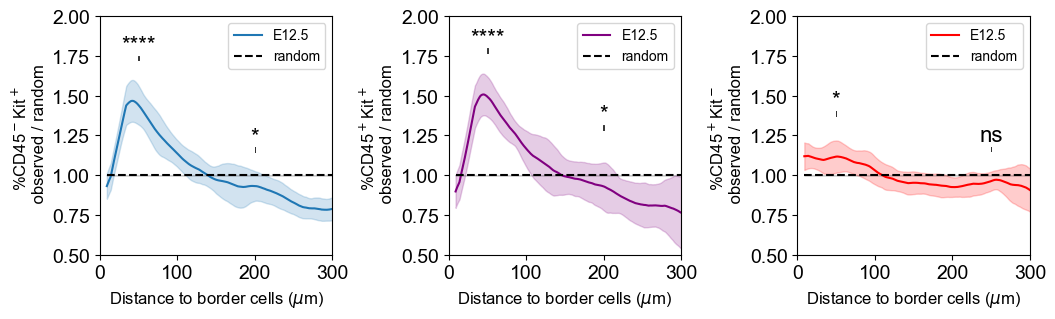

In [24]:
plt.rc('font',family='Arial')

fig = plt.figure(figsize=(12, 3.1))

gs = fig.add_gridspec(nrows=1, ncols=3, width_ratios=[2, 2, 2], wspace=0.5)

ax1 = fig.add_subplot(gs[0, 0])
ax1.tick_params(axis='y', labelsize=14, colors='k')
ax1.tick_params(axis='x', labelsize=14, colors='black')

sns.lineplot(ax = ax1,
             data = Kit_distance_border_E12.loc[Kit_distance_border_E12.type == 'E12.5'],
             x = 'r',
             y = 'mean_smooth_normalized',
             errorbar = 'sd',
             label = 'E12.5',
             color = 'tab:blue')

sns.lineplot(ax = ax1,
             data = Kit_distance_border_E12.loc[Kit_distance_border_E12.type == 'random'],
             x = 'r',
             y = 'mean_smooth_normalized',
             linestyle='--',
             errorbar = 'sd',
             label = 'random',
             color = 'k')
ax1.set_ylabel('%CD45$^-$Kit$^+$ \n observed / random', fontsize = 12, c = 'k')
ax1.set_xlabel('Distance to border cells ($\mu$m)', fontsize = 12)
ax1.set_ylim(0.5,2)
ax1.set_xlim(0,300)

add_stat_annotation(ax = ax1,
                    x="r", 
                    y="mean_smooth_normalized",
                    hue = 'type',
                    data=Kit_distance_border_E12,
                    fontsize = 16,
                    box_pairs=[((50, 'E12.5'), (50, 'random')),
                               ((200, 'E12.5'), (200, 'random'))],
                    test='Mann-Whitney',
                    comparisons_correction=None, 
                    line_offset_to_box=None,
                    line_offset=None,
                    linewidth=0.7,
                    text_format='star',
                    loc='inside',
                    verbose=0)

ax2 = fig.add_subplot(gs[0, 1])
ax2.tick_params(axis='y', labelsize=14, colors='k')
ax2.tick_params(axis='x', labelsize=14, colors='black')

sns.lineplot(ax = ax2,
             data = CD45_Kit_distance_border_E12.loc[CD45_Kit_distance_border_E12.type == 'E12.5'],
             x = 'r',
             y = 'mean_smooth_normalized',
             errorbar = 'sd',
             label = 'E12.5',
             color = 'purple')

sns.lineplot(ax = ax2,
             data = CD45_Kit_distance_border_E12.loc[CD45_Kit_distance_border_E12.type == 'random'],
             x = 'r',
             y = 'mean_smooth_normalized',
             linestyle='--',
             errorbar = 'sd',
             label = 'random',
             color = 'k')
ax2.set_ylabel('%CD45$^+$Kit$^+$ \n observed / random', fontsize = 12, c = 'k')
ax2.set_xlabel('Distance to border cells ($\mu$m)', fontsize = 12)
ax2.set_ylim(0.5,2)
ax2.set_xlim(0,300)

add_stat_annotation(ax = ax2,
                    x="r", 
                    y="mean_smooth_normalized",
                    hue = 'type',
                    data=CD45_Kit_distance_border_E12,
                    fontsize = 16,
                    box_pairs=[((50, 'E12.5'), (50, 'random')),
                               ((200, 'E12.5'), (200, 'random'))],
                    test='Mann-Whitney',
                    comparisons_correction=None, 
                    line_offset_to_box=None,
                    line_offset=None,
                    text_format='star',
                    loc='inside',
                     linewidth=0.7,
                    verbose=0)

ax3 = fig.add_subplot(gs[0, 2])
ax3.tick_params(axis='y', labelsize=14, colors='k')
ax3.tick_params(axis='x', labelsize=14, colors='black')
sns.lineplot(ax = ax3,
             data = CD45_distance_border_E12.loc[CD45_distance_border_E12.type == 'E12.5'],
             x = 'r',
             y = 'mean_smooth_normalized',
             errorbar = 'sd',
             label = 'E12.5',
             color = 'red')

sns.lineplot(ax = ax3,
             data = CD45_distance_border_E12.loc[CD45_distance_border_E12.type == 'random'],
             x = 'r',
             y = 'mean_smooth_normalized',
             linestyle='--',
             errorbar = 'sd',
             label = 'random',
             color = 'k')
ax3.set_ylabel('%CD45$^+$Kit$^-$ \n observed / random', fontsize = 12, c = 'k')
ax3.set_xlabel('Distance to border cells ($\mu$m)', fontsize = 12)
ax3.set_ylim(0.5,2)
ax3.set_xlim(0,300)

add_stat_annotation(ax = ax3,
                    x="r", 
                    y="mean_smooth_normalized",
                    hue = 'type',
                    data=CD45_distance_border_E12,
                    fontsize = 16,
                    box_pairs=[((50, 'E12.5'), (50, 'random')),
                               ((250, 'E12.5'), (250, 'random'))],
                    test='Mann-Whitney',
                    comparisons_correction=None, 
                    line_offset_to_box=None,
                    line_offset=None,
                    text_format='star',
                    loc='inside',
                     linewidth=0.7,
                    verbose=0)

plt.show()

# Load data Stroma / Normalization to random

In [3]:
All_data = pandas.read_csv('Data/Distance_to_border_stroma_E12.csv')

In [4]:
Lhx2_distance_border_random = All_data.loc[(All_data.stroma_type == 'Lhx2+') & (All_data.type == 'random_data')]
Lhx2_distance_border = All_data.loc[(All_data.stroma_type == 'Lhx2+') & (All_data.type == 'observed_data')]

HNF4a_distance_border_random = All_data.loc[(All_data.stroma_type == 'HNF4a+') & (All_data.type == 'random_data')]
HNF4a_distance_border = All_data.loc[(All_data.stroma_type == 'HNF4a+') & (All_data.type == 'observed_data')]

FLK1_distance_border_random = All_data.loc[(All_data.stroma_type == 'FLK1+') & (All_data.type == 'random_data')]
FLK1_distance_border = All_data.loc[(All_data.stroma_type == 'FLK1+') & (All_data.type == 'observed_data')]

In [ ]:
# Lhx2+ cells
Lhx2_distance_border_random_normalized_E12 = pandas.DataFrame()
Lhx2_distance_border_normalized_E12 = pandas.DataFrame()

for date in Lhx2_distance_border.date.unique():
    random_basis = Lhx2_distance_border_random.loc[Lhx2_distance_border_random.date == date].groupby(['r']).mean().reset_index()
    observed_data = Lhx2_distance_border.loc[Lhx2_distance_border.date == date].reset_index(drop=True)
    observed_data['mean_smooth_normalized'] = observed_data['mean_smooth']/random_basis['mean_smooth'] 
    random_basis['mean_smooth_normalized'] =  random_basis['mean_smooth']/random_basis['mean_smooth'] 

    Lhx2_distance_border_random_normalized_E12 = pandas.concat([Lhx2_distance_border_random_normalized_E12, random_basis]).reset_index(drop=True)
    Lhx2_distance_border_normalized_E12 = pandas.concat([Lhx2_distance_border_normalized_E12, observed_data]).reset_index(drop=True)

Lhx2_distance_border_normalized_E12['type'] = 'E12.5'
Lhx2_distance_border_random_normalized_E12['type'] = 'random'
Lhx2_distance_border_E12 = pandas.concat([Lhx2_distance_border_normalized_E12, Lhx2_distance_border_random_normalized_E12]).reset_index(drop=True)

# HNF4a+ cells
HNF4a_distance_border_random_normalized_E12 = pandas.DataFrame()
HNF4a_distance_border_normalized_E12 = pandas.DataFrame()

for date in HNF4a_distance_border.date.unique():
    random_basis = HNF4a_distance_border_random.loc[HNF4a_distance_border_random.date == date].groupby(['r']).mean().reset_index()
    observed_data = HNF4a_distance_border.loc[HNF4a_distance_border.date == date].reset_index(drop=True)
    observed_data['mean_smooth_normalized'] = observed_data['mean_smooth']/random_basis['mean_smooth'] 
    random_basis['mean_smooth_normalized'] =  random_basis['mean_smooth']/random_basis['mean_smooth'] 

    HNF4a_distance_border_random_normalized_E12 = pandas.concat([HNF4a_distance_border_random_normalized_E12, random_basis]).reset_index(drop=True)
    HNF4a_distance_border_normalized_E12 = pandas.concat([HNF4a_distance_border_normalized_E12, observed_data]).reset_index(drop=True)

HNF4a_distance_border_normalized_E12['type'] = 'E12.5'
HNF4a_distance_border_random_normalized_E12['type'] = 'random'
HNF4a_distance_border_E12 = pandas.concat([HNF4a_distance_border_normalized_E12, HNF4a_distance_border_random_normalized_E12]).reset_index(drop=True)

# FLK1+ cells
FLK1_distance_border_random_normalized_E12 = pandas.DataFrame()
FLK1_distance_border_normalized_E12 = pandas.DataFrame()

for date in FLK1_distance_border.date.unique():
    random_basis = FLK1_distance_border_random.loc[FLK1_distance_border_random.date == date].groupby(['r']).mean().reset_index()
    observed_data = FLK1_distance_border.loc[FLK1_distance_border.date == date].reset_index(drop=True)
    observed_data['mean_smooth_normalized'] = observed_data['mean_smooth']/random_basis['mean_smooth'] 
    random_basis['mean_smooth_normalized'] =  random_basis['mean_smooth']/random_basis['mean_smooth'] 

    FLK1_distance_border_random_normalized_E12 = pandas.concat([FLK1_distance_border_random_normalized_E12, random_basis]).reset_index(drop=True)
    FLK1_distance_border_normalized_E12 = pandas.concat([FLK1_distance_border_normalized_E12, observed_data]).reset_index(drop=True)

FLK1_distance_border_normalized_E12['type'] = 'E12.5'
FLK1_distance_border_random_normalized_E12['type'] = 'random'
FLK1_distance_border_E12 = pandas.concat([FLK1_distance_border_normalized_E12, FLK1_distance_border_random_normalized_E12]).reset_index(drop=True)

# Plots stroma cells

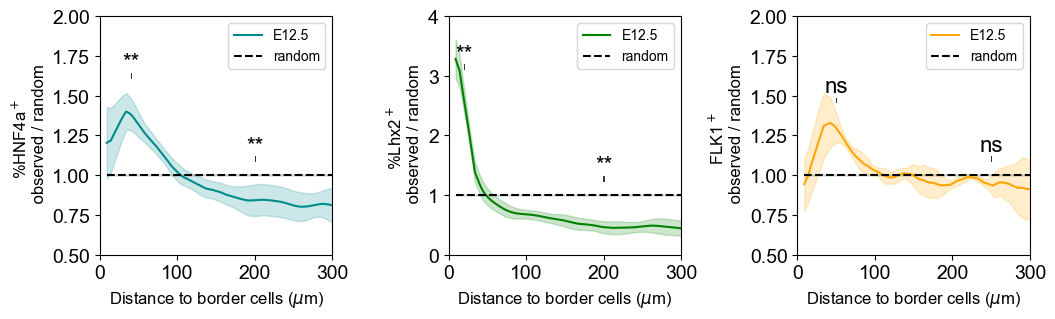

In [8]:
plt.rc('font',family='Arial')

fig = plt.figure(figsize=(12, 3.1))

gs = fig.add_gridspec(nrows=1, ncols=3, width_ratios=[2, 2, 2], wspace=0.5)

ax1 = fig.add_subplot(gs[0, 0])
ax1.tick_params(axis='y', labelsize=14, colors='k')
ax1.tick_params(axis='x', labelsize=14, colors='black')

sns.lineplot(ax = ax1,
             data = HNF4a_distance_border_E12.loc[HNF4a_distance_border_E12.type == 'E12.5'],
             x = 'r',
             y = 'mean_smooth_normalized',
             errorbar = 'sd',
             label = 'E12.5',
             color = 'darkcyan')

sns.lineplot(ax = ax1,
             data = HNF4a_distance_border_E12.loc[HNF4a_distance_border_E12.type == 'random'],
             x = 'r',
             y = 'mean_smooth_normalized',
             linestyle='--',
             errorbar = 'sd',
             label = 'random',
             color = 'k')
ax1.set_ylabel('%HNF4a$^+$ \n observed / random', fontsize = 12, c = 'k')
ax1.set_xlabel('Distance to border cells ($\mu$m)', fontsize = 12)
ax1.set_ylim(0.5,2)
ax1.set_xlim(0,300)

add_stat_annotation(ax = ax1,
                    x="r", 
                    y="mean_smooth_normalized",
                    hue = 'type',
                    data=HNF4a_distance_border_E12,
                    fontsize = 16,
                    box_pairs=[((40, 'E12.5'), (40, 'random')),
                               ((200, 'E12.5'), (200, 'random'))],
                    test='Mann-Whitney',
                    comparisons_correction=None, 
                    line_offset_to_box=None,
                    line_offset=None,
                    linewidth=0.7,
                    text_format='star',
                    loc='inside',
                    verbose=0)

ax2 = fig.add_subplot(gs[0, 1])
ax2.tick_params(axis='y', labelsize=14, colors='k')
ax2.tick_params(axis='x', labelsize=14, colors='black')

sns.lineplot(ax = ax2,
             data = Lhx2_distance_border_E12.loc[Lhx2_distance_border_E12.type == 'E12.5'],
             x = 'r',
             y = 'mean_smooth_normalized',
             errorbar = 'sd',
             label = 'E12.5',
             color = 'green')

sns.lineplot(ax = ax2,
             data = Lhx2_distance_border_E12.loc[Lhx2_distance_border_E12.type == 'random'],
             x = 'r',
             y = 'mean_smooth_normalized',
             linestyle='--',
             errorbar = 'sd',
             label = 'random',
             color = 'k')
ax2.set_ylabel('%Lhx2$^+$ \n observed / random', fontsize = 12, c = 'k')
ax2.set_xlabel('Distance to border cells ($\mu$m)', fontsize = 12)
ax2.set_ylim(0.,4)
ax2.set_xlim(0,300)

add_stat_annotation(ax = ax2,
                    x="r", 
                    y="mean_smooth_normalized",
                    hue = 'type',
                    data=Lhx2_distance_border_E12,
                    fontsize = 16,
                    box_pairs=[((20, 'E12.5'), (20, 'random')),
                               ((200, 'E12.5'), (200, 'random'))],
                    test='Mann-Whitney',
                    comparisons_correction=None, 
                    line_offset_to_box=None,
                    line_offset=None,
                    text_format='star',
                    loc='inside',
                     linewidth=0.7,
                    verbose=0)

ax3 = fig.add_subplot(gs[0, 2])
ax3.tick_params(axis='y', labelsize=14, colors='k')
ax3.tick_params(axis='x', labelsize=14, colors='black')
sns.lineplot(ax = ax3,
             data = FLK1_distance_border_E12.loc[FLK1_distance_border_E12.type == 'E12.5'],
             x = 'r',
             y = 'mean_smooth_normalized',
             errorbar = 'sd',
             label = 'E12.5',
             color = 'orange')

sns.lineplot(ax = ax3,
             data = FLK1_distance_border_E12.loc[FLK1_distance_border_E12.type == 'random'],
             x = 'r',
             y = 'mean_smooth_normalized',
             linestyle='--',
             errorbar = 'sd',
             label = 'random',
             color = 'k')
ax3.set_ylabel('FLK1$^+$ \n observed / random', fontsize = 12, c = 'k')
ax3.set_xlabel('Distance to border cells ($\mu$m)', fontsize = 12)
ax3.set_ylim(0.5,2)
ax3.set_xlim(0,300)

add_stat_annotation(ax = ax3,
                    x="r", 
                    y="mean_smooth_normalized",
                    hue = 'type',
                    data=FLK1_distance_border_E12,
                    fontsize = 16,
                    box_pairs=[((50, 'E12.5'), (50, 'random')),
                               ((250, 'E12.5'), (250, 'random'))],
                    test='Mann-Whitney',
                    comparisons_correction=None, 
                    line_offset_to_box=None,
                    line_offset=None,
                    text_format='star',
                    loc='inside',
                     linewidth=0.7,
                    verbose=0)

plt.show()